# Loading datasets from location with preprocessed data

In [1]:
import os

path_to_local_folder = os.path.expanduser('~/charon_local')
filter_include = ["synth", "A04hm_H1", "nocond"]
filter_exclude = ["failed"]

### gather the folders and filter the names for selection

In [2]:
from raw_data import get_subfolder_paths_processed, filter_datasets

subfolders = get_subfolder_paths_processed(path_to_local_folder)
subfolders_filt = filter_datasets(subfolders, filter_include, filter_exclude)
subfolders_filt

['/home/ber0061/charon_local/borehole_H1/synth_A04hm_H1_nocond_nocorr_20230602',
 '/home/ber0061/charon_local/borehole_H1/synth_A04hm_H1_nocond_20230419',
 '/home/ber0061/charon_local/borehole_H1_proposal_std/synth_A04hm_H1_nocond_nocorr_20230619b',
 '/home/ber0061/charon_local/borehole_H1_proposal_std/synth_A04hm_H1_nocond_nocorr_20230618b',
 '/home/ber0061/charon_local/borehole_H1_proposal_std/synth_A04hm_H1_nocond_nocorr_20230618a',
 '/home/ber0061/charon_local/borehole_H1_proposal_std/synth_A04hm_H1_nocond_nocorr_20230619',
 '/home/ber0061/charon_local/borehole_H1_proposal_std/synth_A04hm_H1_nocond_nocorr_20230618c',
 '/home/ber0061/charon_local/borehole_H1_proposal_std/synth_A04hm_H1_nocond_nocorr_20230619c']

### Load insides of folders into one MultiRawData object

In [3]:
from raw_data import MultiRawData

all_raw_data = MultiRawData()
all_raw_data.load_from_folders_hdf5(subfolders_filt)

# Some demostration on resulting object

In [5]:
all_raw_data.print_statistics()


raw data: no_samples 187645
raw data: no_nonconverging 20013
raw data: p (187645, 8)
raw data: w (187645, 1)
raw_data: np.sum(weights): 1950106.0
raw_data: all_sizes: {'types': (187645,), 'stages': (187645,), 'chains': (187645,), 'tags': (187645,), 'parameters': (187645, 8), 'observations': (187645, 26), 'parameters_normalized': (187645, 8), 'weights': (187645, 1), 'run_ids': (187645,)}


In [6]:
all_raw_data_filter_tag = all_raw_data.filter(tags=[1])
all_raw_data_filter_tag_wrong = all_raw_data.filter(tags=[-1])


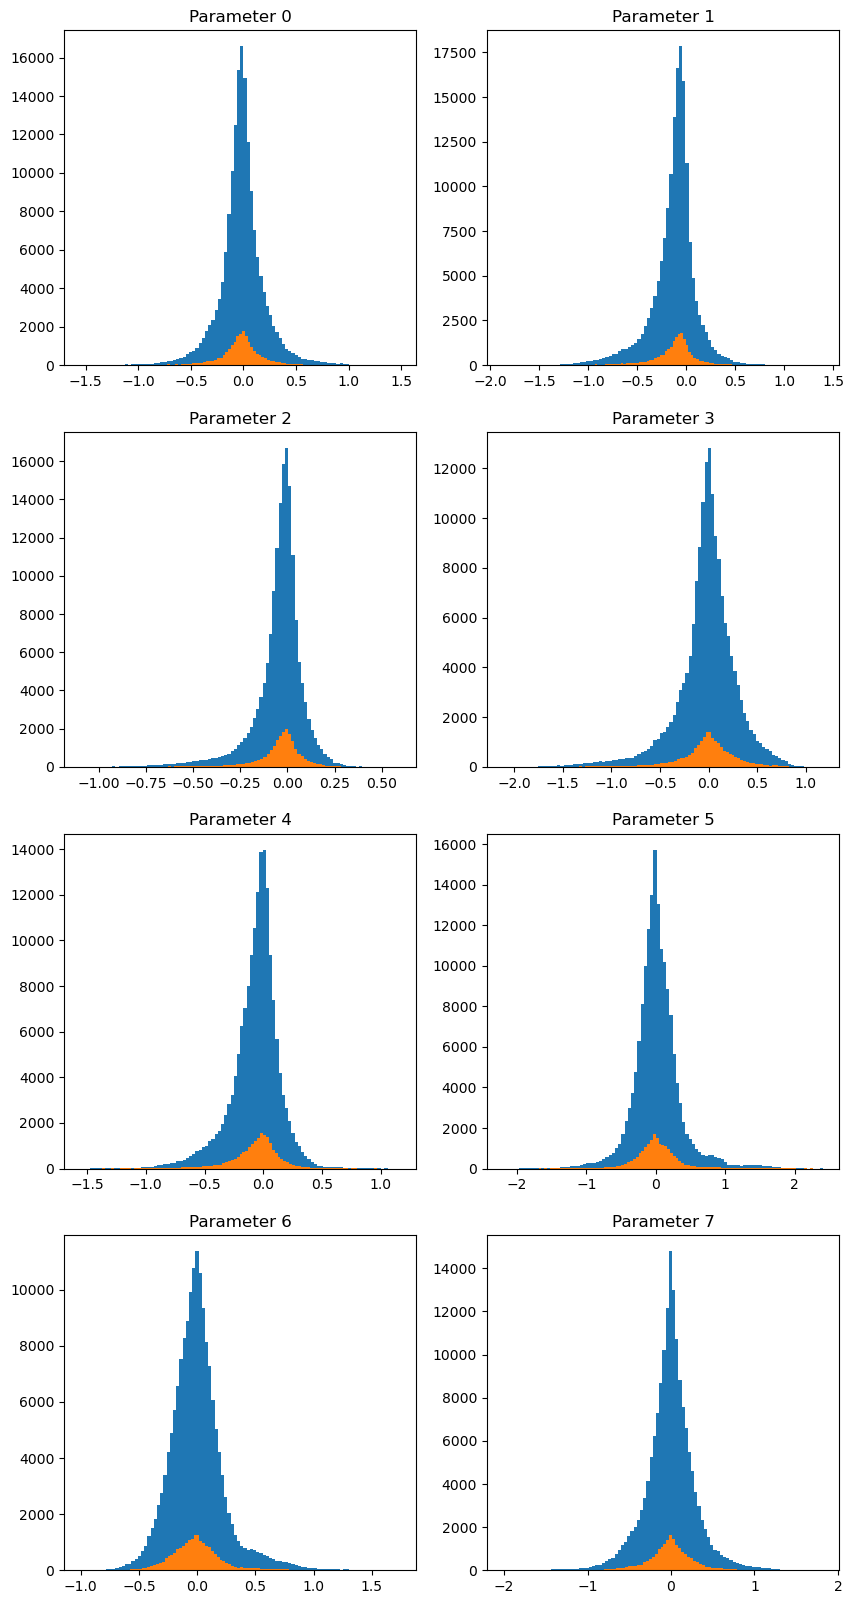

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# make 8 subplots 4 rows, 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
axs = axs.ravel()
for i in range(8):
# plot histogram of observations
    axs[i].hist(all_raw_data_filter_tag.parameters_normalized[:,i], bins=100)  # type: ignore
    axs[i].hist(all_raw_data_filter_tag_wrong.parameters_normalized[:,i], bins=100)  # type: ignore
    axs[i].set_title(f"Parameter {i}")
